In [1]:
from src.System import *

In [13]:
c1=grafeno()
c2=grafeno().mRot(1.5)
c3=grafeno().mRot(1.5*2)
#c4=importa("hBn")
#c3=importa("GeSe_Beta")

In [ ]:
c2.enls=[((0.6666666,0.6666666),(1.0,1.0)),
         ((0.6666666,0.6666666),(0.0,1.0)),
         ((0.6666666,0.6666666),(1.0,0.0))]
c3.enls=[((0.75,0.3677821160),(0.75,0.8466233610)),
         ((0.25,0.8684009310),(0.25,0.3469434380)),
         ((0.75,0.3677821160),(0.25,0.3469434380)),
         ((0.25,0.8684009310),(0.75,0.8466233610)),
         ((0.75,0.3677821160),(1.25,0.3469434380)),
         ((0.75,0.8466233610),(1.25,0.8684009310)),
         ((0.25,0.8684009310),(0.25,1.3469434380)),
         ((0.75,0.8466233610),(0.75,1.3677821160))]

In [14]:
s=system([c1,c2,c3])

In [28]:
s.calculateTM?

In [29]:
s.searchLP(rangeOfSearch=100, epsilon=0.005)
s.calculateTM(s=False)
s.muestra()

Puntos de red en comun encontrados: 6185
Sistema Hexagonal

**Opción 1. T <- Matriz loMat[0] del sistema
Tamaño de los vectores primitivos:|a|=86.6458,|b|=86.6458
Ángulo entre vectores:120.00°
+-------------------+-------------+---------------------+-----------------+------------------+---------+
|        Red        |      T      |     Deformación     | G de Distorsión |   delta--theta   | #Átomos |
+-------------------+-------------+---------------------+-----------------+------------------+---------+
|                   | |  20  -41| | |     1.0      0.0| |    0.00000000   |  0.000% -- 0.0°  |   2522  |
|      Grafeno      | |  41  -21| | |     0.0      1.0| |                 |  0.00% -- 0.0°   |         |
|                   |             |                     |                 |                  |         |
|                   | |  21  -41| | | 1.00114 -0.00229| |    0.00000000   | 0.000% -- -0.0°  |   2522  |
| Grafeno(rot 1.5°) | |  41  -20| | | 0.00229  0.99885| |               

[[42, -22], [22, 20]]

***La supercelda calculada está optimizada
Matriz de trasformación:
	42	-22
	22	20

Sistema [Grafeno,Grafeno(rot 1.5°),Grafeno(rot 3.0°)] 
Celda unitaria con 7942 átomos:


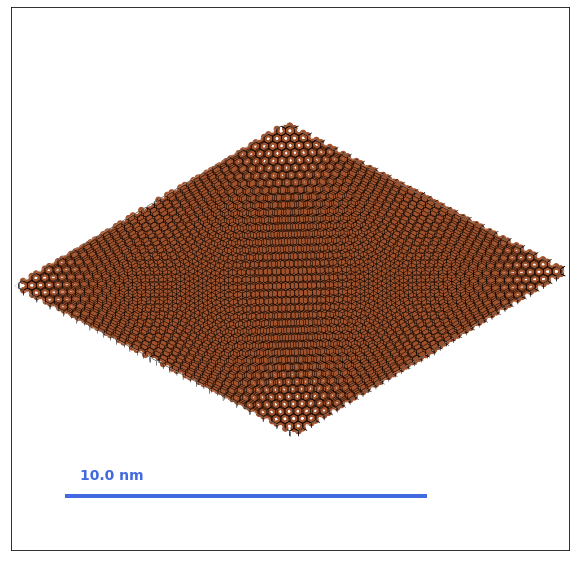

Espacio Reciproco:
Calculando...
...Pintando capa 1 (Grafeno)
...Pintando capa 2 (Grafeno(rot 1.5°)(Opt))
...Pintando capa 3 (Grafeno(rot 3.0°)(Opt))
...Terminado


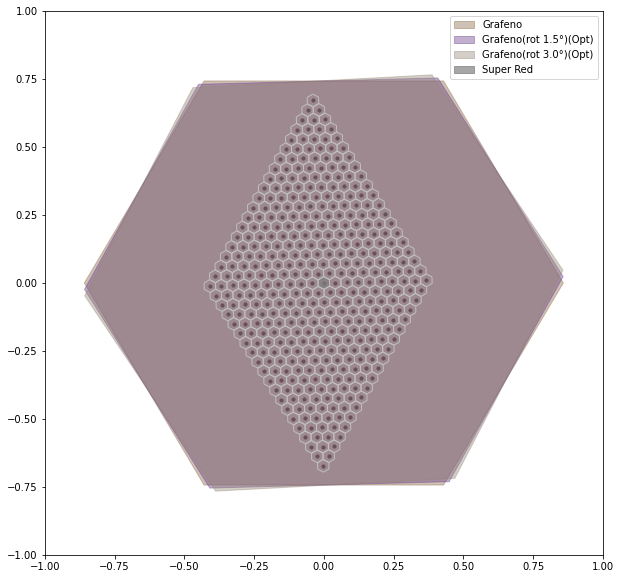

(<src.System.system at 0x1927d902790>,
 [[[1.001131312846172, -0.0015086168696002433],
   [0.0015086168696002988, 0.9996226959765719]],
  [[1.0015046344476946, -0.0030160915130369448],
   [0.0030160915130369656, 0.9984885429346575]]])

In [17]:
s.optimize_system(s.loMat[4])

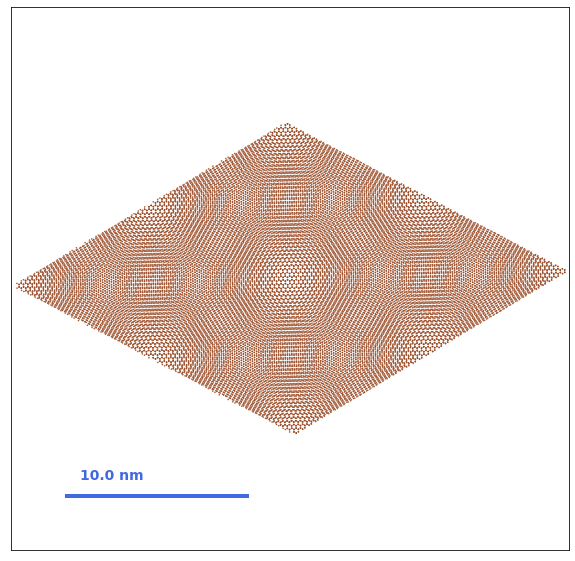

1

In [26]:
s.SuperRed.showXY(2,2,t=0.1,name="Queseso")

In [12]:
num(59999)

100000

In [ ]:
m1=superMesh((30,0),(0,30),[c1,c2.mRot(15.3),c3.mRot(11)])

In [ ]:
m1.showXY(1,1,t=30)

In [ ]:
s1=system([c1,c2.mRot(15.3),c3.mRot(11)])

In [ ]:
s1.creaSR()

In [ ]:
s1op,d=s1.optimize_system(s1.MT)

In [ ]:
i=0
for c in s1op.redes:
    m=superMesh((50,0),(0,30),[c])
    m.showXY(1,1,name="Capa"+str(i))
    i+=1
m=superMesh((50,0),(0,30),[s1op.SuperRed])
m.showme()

In [ ]:
s1op.SuperRed.printReciprocalSpace(prnt='True')

In [ ]:
s1op.SuperRed.showXY(1,1,t=20,name='Celda primitiva')

In [ ]:
ph=blackPhospho()
g =grafeno().mRot(12.4)

In [ ]:
phg=system([ph,g])
T=[[4,1],[3,4]]
phg.createSuperLattice(T)
phg.show()

In [ ]:
cosa=superMesh((40,0),(0,20),[phg.SuperRed])
cosa.showXY(1,1, t=10,name='phgOr')

In [ ]:
sop,d=phg.optimize_system(T)

In [ ]:
cosa=superMesh((40,0),(0,20),[sop.SuperRed])
cosa.showXY(1,1, t=10,name='phgOp')
d

In [ ]:
m2M(d[0],vTm(g.a,g.b))

In [ ]:
aop,bop=mTv(m2M(vTm(g.a,g.b),d[0]))
((long(aop)/long(g.a))), ((long(bop)/long(g.b))),cAng(g.a,aop),cAng(g.b,bop),cAng(aop,bop)

In [ ]:
v1,v2=m2V(ph.a,ph.b,(1,4)), m2V(g.a,g.b,(7,8))
print(dist(v1,v2)/long(v1))
v1,v2=m2V(ph.a,ph.b,(1,4)), m2V(aop,bop,(7,8))
print(dist(v1,v2))

In [ ]:
mi=vTm(g.a,g.b)
ms=m2M

In [ ]:
calcCD(ph, g, (1,4))

In [ ]:
phg.muestra()

In [ ]:
#ang=-11.17
ang=21.787
#ang=9.43
c1=grafeno()
c2=grafeno().mRot(ang)
c3=grafeno3().mRot(ang)
c4=grafeno().mRot(ang*3)
for a in c2.atms[0]:
    a.color="steelblue"
for a in c3.atms[0]:
    a.color="steelblue"
for a in c4.atms[0]:
    a.color="steelblue"

In [ ]:
AA=system([c1,c2])
AB=system([c1,c3])
T=[[2,1],[-1,3]]
AA.createSuperLattice(T)
AB.createSuperLattice(T)
AA.show()
AB.show()

In [ ]:
sm1=superMesh((30,0),(0,18),[c1,c2])
sm1.showXY(1,1,t=20,name='GG(s6-s6)')
sm2=superMesh((30,0),(0,18),[c1,c3])
sm2.showXY(1,1,t=20,name='GG(s6-s3)')

In [ ]:
AB.SuperRed.printReciprocalSpace(prnt='True')

In [ ]:
AA.muestra()

In [ ]:
c1.printReciprocalSpace(prnt=True)

In [ ]:
c3.printReciprocalSpace()

In [ ]:
u=multV(25,c1.a)
v=rota(multV(30,c1.a),90)
l1=superMesh(u,v, [c1])
l1.showXY(1,1,t=10,name='img1')
l2=superMesh(u,v, [c2])
l2.showXY(1,1,t=10,name='img2')
l3=superMesh(u,v,[c1,c2])
l3.showXY(1,1,t=10,name='img3')

In [ ]:
V=sumaV(multV(2,c1.a),multV(-1,c1.b))
cAng((1.0,0.0),V)

In [ ]:
v1=m2V(c1.a,c1.b,(2,-1))
v2=m2V(c1.a,c1.b,(1,-2))
cAng(v1,v2)

In [ ]:
s1=system([c1,c2])
s2=system([c1,c3])
T=[[2,1],[-1,3]]

In [ ]:
s1.createSuperLattice(T)
s1.show()
s2.createSuperLattice(T)
s2.show()

In [ ]:
s1.SuperRed.detachment=6
s2.SuperRed.detachment=6
s1.SuperRed.exporta(name='Sistema21_78S6S6')
s2.SuperRed.exporta(name='Sistema21_78S6S3')

In [ ]:
s1.creaSR(range_search=15, eps=0.05)

In [ ]:
s1.muestra()

In [ ]:
s1.SuperRed.showXY(3,3,t=5,name='BilayerG(9_43)')
s1.SuperRed.printReciprocalSpace(prnt=True)

In [ ]:
s2o.SuperRed.showXY(2,2,t=5,name='KiralC1-C2')

In [ ]:
T=[[2,1],[-1,3]]

In [ ]:
s3=system([c1,c2])
s3.createSuperLattice(T)
s3.show()
#s3o,d=s3.optimize_system(s1.MT)

In [ ]:
s3.SuperRed.showXY(3,3)

In [ ]:
s3o.SuperRed.showXY(2,2,t=5,name='KiralC1-C3')

In [ ]:
s1o,d=s1.optimize_system(s1.loMat[0])
s1o.SuperRed.showXY(3,3,t=5,name='BilayerG(9_43)m')
s1o.SuperRed.printReciprocalSpace(prnt=True)

In [ ]:
s1o.SuperRed.printReciprocalSpace(prnt=True)

In [ ]:
s2, d = s1.optimize_system(s1.MT)

In [ ]:
s2.SuperRed.showXY(20,20)

In [ ]:
s2.SuperRed.mRot(ar-15).showXY(1,1,name="Kiral1_OP",t=20)

In [ ]:
ar=cAng(s2.SuperRed.a,(1.0,0.0))
s2.SuperRed.mRot(ar-15).showXY(3,3,t=7,name="Kiral h")

In [ ]:
s2.SuperRed.printReciprocalSpace(prnt=True)

In [ ]:
sr1=superMesh((50,0),(0,50),s1.redes)
sr2=superMesh((50,0),(0,50),s2.redes)

In [ ]:
sr1.showXY(1,1, t=20, name='original')
sr2.showXY(1,1, t=20, name='optimizado')

In [ ]:
for r in s2.redes:
    print(r)

In [ ]:
l=s1.SuperRed.atms[0]

In [ ]:
err=0.001
##lc=l.copy()
'''for i in range(len(l)):
    l2=l[i+1:]
    print('Distancias a',l[i],l[i].posZ)
    for a in l2:
        if a.posZ==l[i].posZ:
            (x1,y1)=l[i].pos
            (x2,y2)=a.pos
            (dx,dy)=(abs(x1-x2),abs(y1-y2))
            print("({:.4f},{:.4f})".format(dx,dy))
            if checkP(dx,err):
                print("*")
                if checkP(dy,err):
                    print("**Eliminamos A_{}**".format(i))
                    lc.remove(l[i])
                    break
len(lc)'''

def cleanA(r):
    '''
    Limpia la lista de átomos de una Red eliminando los repetidos.
    '''
    atms=r.atms
    newAtms=[]
    cont=0
    for loa in atms:
        lc=loa.copy()
        for i in range(len(loa)):
            l2 = loa[i+1:]
            for a in l2:
                if a.posZ == loa[i].posZ:
                    (x1,y1) = loa[i].pos
                    (x2,y2) = a.pos
                    if checkP((x1-x2),err):
                        if checkP((y1-y2),err):
                            cont+=1
                            lc.remove(loa[i])
                            break
        newAtms.append(lc)
    print("Se eliminaron {} átomos repetidos".format(cont))
    r.atms=newAtms
    return newAtms

In [ ]:
na=cleanA(s1.SuperRed,err=0.01)
len(s1.SuperRed.atms[0])

In [ ]:
s1.SuperRed.showXY(2,2)

In [ ]:
def checkA(a, atms, err):
    '''
    Verifica si ya existe una imagen del átomo a en la lista atms 
    '''
    newlist=atms.copy()
    for at in atms:
        d=dist(a.pos,at.pos)
        if d<err:
            return False
        if abs(1-d)<err:
            return False
    return True

In [ ]:
for a in l:
    print(a)

In [ ]:
s2=system([grafeno(),grafeno().mRot(30)])

In [ ]:
s2.creaSR(eps=0.03)

In [ ]:
s2op.SuperRed.showXY(1,1,name="Sistema30op")

In [ ]:
s2op.SuperRed.exporta(name="sistema30op")

In [ ]:
s2op, d = s2.optimize_system(s2.MT)

In [ ]:
ar=cAng((1,0),s3.SuperRed.a)

In [ ]:
srot=s2op.SuperRed.mRot(-ar)
srot.name="Pimitiva30op"
srot.showXY(1,1,name="Pimitiva30op",t=30)

In [ ]:
srot.showXY(5,5,name="Manta3B2",t=20)

In [ ]:
s2op.SuperRed.printReciprocalSpace(prnt=True)

In [ ]:
r1=grafeno()
r2=grafeno3().mRot(-21.78)
for a in r2.atms[0]:
    a.color="olive"
s3=system([r1,r2])

In [ ]:
s3.creaSR(eps=0.03)

In [ ]:
s3.SuperRed.mRot(-ar).showXY(5,5, t=20)

In [ ]:
s3.muestra()

In [ ]:
s3op, d = s3.optimize_system(s3.loMat[0])

In [ ]:
srot=s3.SuperRed.mRot(-ar)
srot.name="Pimitiva21_78"
srot.showXY(1,1,name="Pimitiva21_78",t=40)

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / t
s=12
plt.axhline(xmin=0.1,xmax=0.35,y = -7, color ="white",lw=8.0)
plt.axhline(xmin=0.1,xmax=0.35,y = -7, color ="royalblue",lw=4.0)
#plt.text(-7.5, -6.5, "{} nm".format(s/10), fontsize=15, c='black',ma='center',style='oblique')
plt.text(-7.5, -6.5, "{} nm".format(s/10), fontsize=15, c='royalblue',backgroundcolor='white')
plt.axhline(y = 0.5, color ="green", linestyle =":")
plt.axhline(y = 1.0, color ="green", linestyle ="--")
  
plt.axvline(color ="black")
  
plt.plot(t, sig, linewidth = 2, 
         label = r"$\sigma(t) = \frac{1}{x}$")
  
plt.xlim(-10, 10)
plt.xlabel("t")
plt.title("Graph of 1 / x")
plt.legend(fontsize = 14)
  
plt.show()